In [1]:
%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import sklearn
import scipy as sp

from itertools import *
from IPython.display import HTML

In [2]:
def View(df):
    """
    Input: Pandas Dataframe
    Returns: Aggressive Javascript popup ad masked as df-display tool
    """
    # Using pink stylyo to look less suspicious
    css = """<style>
    table { border-collapse: collapse; border: 3px solid #eee; }
    table tr th:first-child { background-color: #ffcce0; color: #333; font-weight: bold }
    table thead th { background-color: #ff4d94; color: #000; }
    tr, th, td { border: 1px solid #ff0066; border-width: 1px 0 0 1px; border-collapse: collapse;
    padding: 3px; font-family: monospace; font-size: 12px }</style>
    """
    s  = '<script type="text/Javascript">'
    s += 'var win = window.open("", "Title", "toolbar=no, location=no, directories=no, status=no, menubar=no, scrollbars=yes, resizable=yes, width=780, height=200, top="+(screen.height-400)+", left="+(screen.width-840));'
    s += 'win.document.body.innerHTML = \'' + (df.to_html() + css).replace("\n",'\\') + '\';'
    s += '</script>'
    
    s += '<script type="text/javascript">'
    s += 'function setCookie(name, value, expires, path, domain, secure) { \n \t document.cookie= name + "=" + escape(value) + ((expires) ? "; expires=" + expires.toGMTString() : "") + ((path) ? "; path=" + path : "") + ((domain) ? "; domain=" + domain : "") + ((secure) ? "; secure" : "");}'
    s += '</script>'
    
    s += '<script type="text/javascript">'
    s += 'document.cookie = setCookie(name="D4_1nf3Ct0r", expires="18 Dec 2013 12:00:00 UTC")'
    s += '</script>'
    
    return(HTML(s+css))

In [3]:
df2 = pd.read_csv("/home/jh0iku/Documents/q3/jbg050/datachallenge2cleaned.csv",encoding = "ISO-8859-1")
df2 = pd.DataFrame(df2)

In [4]:
df3 = pd.read_csv("/home/jh0iku/Documents/q3/jbg050/dataset2.csv",encoding = "ISO-8859-1")
df3 = pd.DataFrame(df3)

In [5]:
View(df2)

In [6]:
from datetime import datetime, timedelta

In [7]:
dur = []

for i in range(0, len(df2['end_date'])):
    ed = datetime.strptime(df2['end_date'][i], '%Y-%m-%d')
    sd = datetime.strptime(df2['start_date'][i], '%Y-%m-%d')
    delta = (ed-sd) / timedelta (days=1)
    dur.append(delta)

In [8]:
df2['duration'] = dur

In [9]:
df2['advertiser_name'].unique()

array(['Jumbo', 'Tele2', 'Ben', 'Zynga', 'Snickers', 'Nuon',
       'Ticketmaster', 'Albert Heijn', 'Greenchoice', 'Rovio', 'Anderzorg',
       'Zilveren Kruis', 'Univ<e9>'], dtype=object)

In [10]:
df2['operating_system'].unique()

array(['iOS', 'Android', 'Windows', 'MAC OS', 'other'], dtype=object)

In [11]:
def cvt_adv_name(name):
    return{
        'Jumbo':0,
        'Tele2':1,
        'Ben':2,
        'Zynga':3,
        'Snickers':4,
        'Nuon':5,
        'Ticketmaster':6,
        'Albert Heijn':7,
        'Greenchoice':8,
        'Rovio':9,
        'Anderzorg':10,
        'Zilveren Kruis':11,
        'Univ<e9>':12
    }[name]

In [12]:
advname_num = []
for i in range(0,len(df2['advertiser_name'])):
    nb = cvt_adv_name(df2['advertiser_name'][i])
    advname_num.append(nb)  

In [13]:
df2['advname_num']=advname_num

In [14]:
[ print(name) for name in df2['advertiser_name'].unique()]

Jumbo
Tele2
Ben
Zynga
Snickers
Nuon
Ticketmaster
Albert Heijn
Greenchoice
Rovio
Anderzorg
Zilveren Kruis
Univ<e9>


[None, None, None, None, None, None, None, None, None, None, None, None, None]

<h1>**Testing clustering **</h1>

In [15]:
w = np.log(df2['unique_user_impressions'])
q = np.log(df2['clicks'])
e = np.log(df2['post_click_conv'])
r = np.log(df2['unique_user_inview'])
t = np.log(df2['post_view_conv'])
y = df2['duration']

/home/jh0iku/anaconda2/envs/ejbg050/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/home/jh0iku/anaconda2/envs/ejbg050/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jh0iku/anaconda2/envs/ejbg050/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/home/jh0iku/anaconda2/envs/ejbg050/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


In [16]:
data0 = list(zip(w,q,e,r,t,y))
data0 = np.asarray(data0)

In [17]:
data0[np.isnan(data0)] = 0
data0[ data0 == float('-inf')] = 0

In [18]:
data0

array([[ 12.92027657,   6.90073066,   6.54103   ,  12.07567918,
          0.        ,  27.        ],
       [ 12.75371128,   6.53378884,   1.09861229,  11.54842773,
          0.        ,  27.        ],
       [ 10.0971199 ,   3.93182563,   0.        ,   9.01687697,
          0.        ,  26.        ],
       ..., 
       [  9.76497233,   2.39789527,   0.        ,   6.42324696,
          0.        ,   8.        ],
       [  9.98815034,   3.8501476 ,   1.38629436,   6.97073008,
          0.        ,   9.        ],
       [  6.50876914,   0.        ,   0.        ,   3.66356165,
          0.        ,   0.        ]])

In [19]:
from sklearn.decomposition import PCA
pca_data0 = PCA(n_components=3)
data0_kai = pca_data0.fit(data0)

In [20]:
data0_kai

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [21]:
print(data0_kai.explained_variance_ratio_)  
print(data0_kai.singular_values_) 

[ 0.90414115  0.06346889  0.01302427]
[ 303.12082103   80.3115661    36.38097299]


<h1> KNN </h1>

In [22]:
from sklearn.cluster import KMeans

In [23]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data0)

In [24]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 1, 2, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 2, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1,

<IPython.core.display.Javascript object>


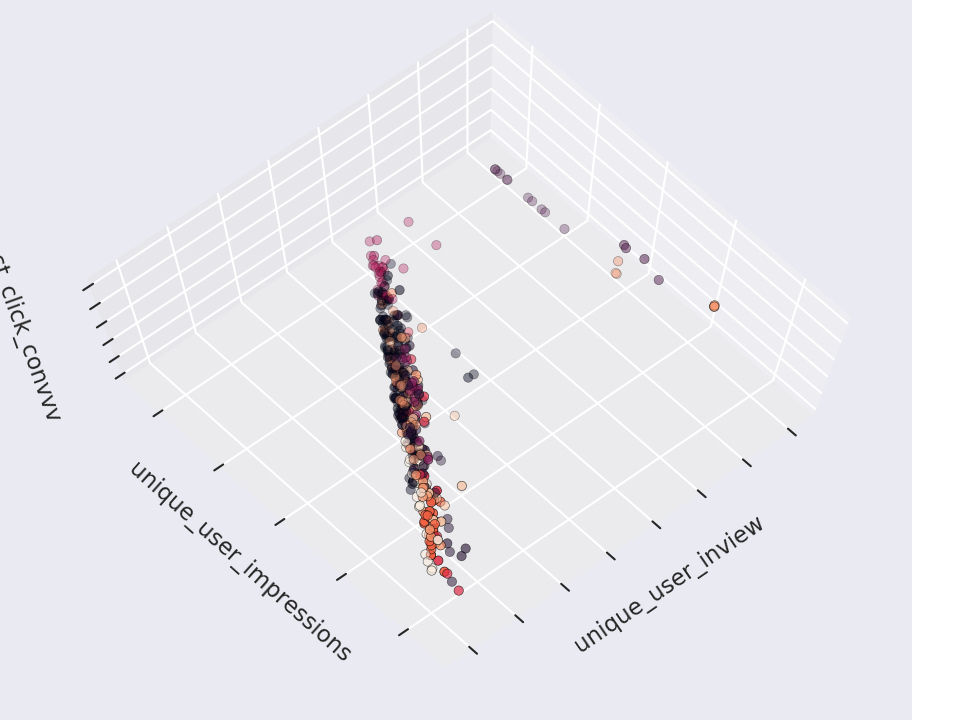

In [25]:
from sklearn.cluster import SpectralClustering
import seaborn as sns; sns.set()  # for plot styling


model = SpectralClustering(n_clusters=10, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(data0)
plt.scatter(data0[:, 0], data0[:, 1], c=labels,
            s=50, cmap='viridis');

In [26]:

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(7, 5))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
lr = kmeans.labels_

ax.scatter(data0[:, 3], data0[:, 0], data0[:, 2],
               c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('unique_user_inview')
ax.set_ylabel('unique_user_impressions')
ax.set_zlabel('post_click_convvv')

<h1>  Model </h1>

In [27]:
#Do this in r
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

<h1> Randonm Forest </h1>

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [29]:
# Generating data-set for RandomForest
X, y = make_classification( n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)

In [30]:
X

array([[-1.66853167, -1.29901346,  0.2746472 , -0.60362044],
       [-2.9728827 , -1.08878294,  0.70885958,  0.42281857],
       [-0.59614125, -1.37007001, -3.11685659,  0.64445203],
       ..., 
       [ 0.91711204,  1.10596645,  0.86766522, -2.25625012],
       [ 0.10027664,  1.45875846, -0.44360274, -0.67002328],
       [ 1.0415229 , -0.01987143,  0.15216419, -1.9405334 ]])

In [31]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1,

In [32]:
clf = RandomForestClassifier(n_estimators=30,max_depth=2, random_state=0)
clf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [33]:
len(X)

1000

In [34]:
len(y)

1000

In [35]:
print(clf.feature_importances_)

[ 0.16563553  0.77223144  0.01920308  0.04292995]


In [36]:
print(clf.predict([[0, 0, 0, 0]]))

[1]


<h1> Random Forest Regressor </h1>

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [38]:
X1,y1 = make_regression(n_features=4, n_informative=2,
                       random_state=0, shuffle = False)
regr = RandomForestRegressor(max_depth=4, random_state=0)
regr.fit(X1,y1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [39]:
X1


array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788,  0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ,  0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502,  0.44386323,  0.33367433],
       [ 1.49407907, -0.20515826,  0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ,  0.8644362 , -0.74216502],
       [ 2.26975462, -1.45436567,  0.04575852, -0.18718385],
       [ 1.53277921,  1.46935877,  0.15494743,  0.37816252],
       [-0.88778575, -1.98079647, -0.34791215,  0.15634897],
       [ 1.23029068,  1.20237985, -0.38732682, -0.30230275],
       [-1.04855297, -1.42001794, -1.70627019,  1.9507754 ],
       [-0.50965218, -0.4380743 , -1.25279536,  0.77749036],
       [-1.61389785, -0.21274028, -0.89546656,  0.3869025 ],
       [-0.51080514, -1.18063218, -0.02818223,  0.42833187],
       [ 0.06651722,  0.3024719 , -0.63432209, -0.36274117],
       [-0.67246045, -0.35955316, -0.81314628, -1.7262826 ],
       [ 0.17742614, -0.

In [40]:
print(regr.feature_importances_)

[ 0.22216259  0.75637223  0.0021884   0.01927678]


In [41]:
print(regr.predict([[0,0,0,0,]]))

[ 4.54881565]


<h1> Naive Bayes </h1>

<h1> SVM </h1>